In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [2]:
# cf S. Caracciolo et al, arXiv:1012.1177
# also Rensburg, Chap 9

nu = 4./7
phi = 3./7
U_theta = 1./1.4986

In [3]:
dtyp = [("L", int), ("U", float), ("nn", float), ("err_nn", float),
        ("var_nn", float), ("err_var_nn", float), ("R2", float), ("err_R2", float)]

arr = np.loadtxt("hcap.conformations.dat", dtype=dtyp)
df = pd.DataFrame(arr)
df

,L,U,nn,err_nn,var_nn,err_var_nn,R2,err_R2
0,250,0.50,92.452,0.0036,0.70496,0.0040,1418.20,0.34000
1,250,0.55,101.770,0.0035,0.78503,0.0047,1186.50,0.34148
2,250,0.60,112.040,0.0038,0.85316,0.0050,956.73,0.21000
3,250,0.62,116.350,0.0040,0.87289,0.0050,869.11,0.22000
4,250,0.64,120.740,0.0044,0.88566,0.0050,785.40,0.21000
5,250,0.65,122.970,0.0044,0.88947,0.0055,745.54,0.20000
6,250,0.66,125.190,0.0045,0.89046,0.0075,706.92,0.19000
7,250,0.68,129.630,0.0046,0.88659,0.0080,633.97,0.17000
8,250,0.70,134.030,0.0038,0.87363,0.0060,567.47,0.15000
9,250,0.80,154.090,0.0036,0.71045,0.0060,336.32,0.08000


# Analyze the square end-to-end distance, $\langle R^2 \rangle$

<IPython.core.display.Javascript object>


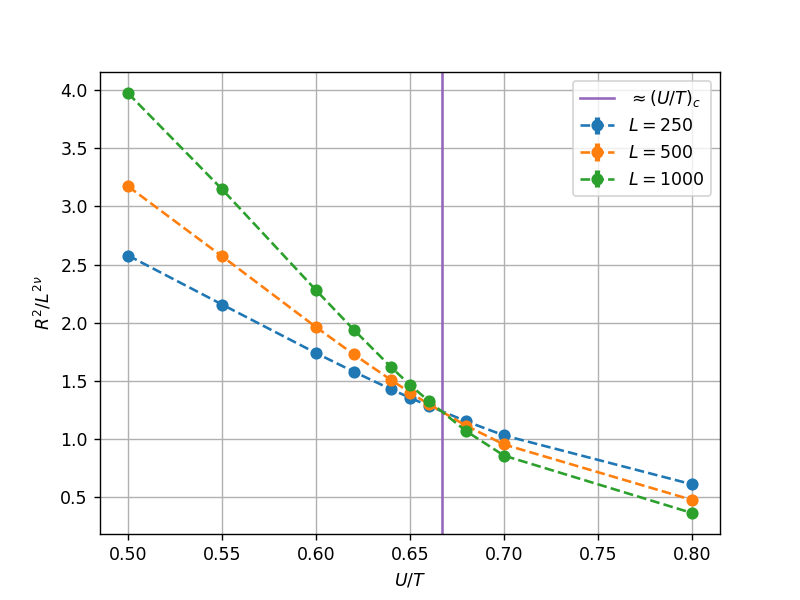

In [4]:
fig, ax = plt.subplots(1, 1)

for L, grp in df.groupby("L"):
    ax.errorbar(grp["U"], grp["R2"] / L**(2*nu), yerr=grp["err_R2"] / L**(2*nu),
                fmt='o--', elinewidth=3, label=r"$L=%s$" % L)

ax.axvline(U_theta, label=r'$\approx(U/T)_c$', color='C4')
ax.set_ylabel(r'$R^2 / L^{2\nu}$')
ax.set_xlabel(r'$U/T$')
ax.legend(loc='best')
plt.grid(True)
plt.show()

## Try the data collapse for $R^2$ with known exponents

Eq. (3.1) of `S. Caracciolo, arXiv:1012.1177`:

$$
\langle R^2 \rangle / L^{2\nu} = a + b L^{\phi} (\beta - \beta_\theta)
$$

Here $\beta = 1/T$, hence  $\propto U/T$, which is our $U$

<IPython.core.display.Javascript object>


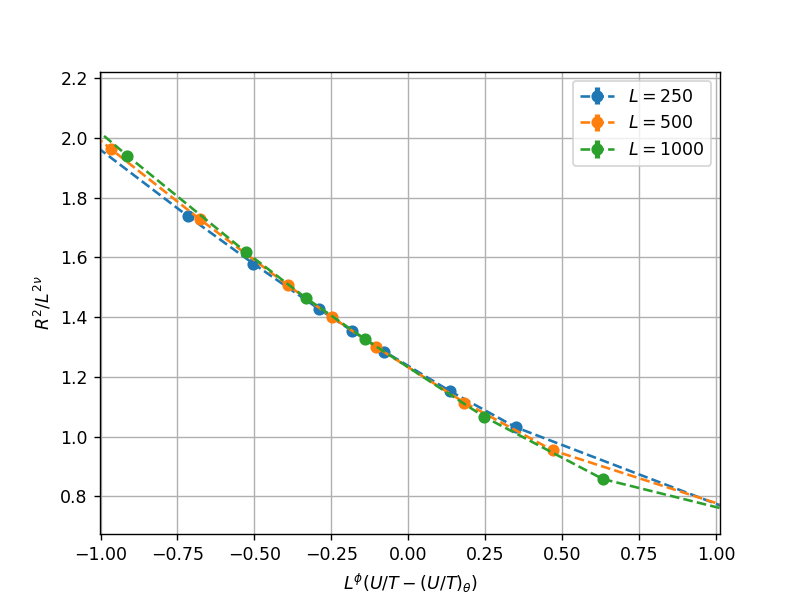

In [5]:
fig, ax = plt.subplots(1, 1)

for L, grp in df.groupby("L"):
    ax.errorbar((grp["U"] - U_theta) * L**phi,
                grp["R2"] / L**(2*nu),
                yerr=grp["err_R2"] / L**(2*nu),
                fmt='o--', elinewidth=3, label=r"$L=%s$" % L)

ax.set_ylabel(r'$R^2 / L^{2\nu}$')
ax.set_xlabel(r'$ L^{\phi} \left(U/T - (U/T)_\theta \right)$')
ax.legend(loc='best')
plt.grid(True)
plt.show()

## Try multiparam fit

In [6]:
ranges = {250: [0.59, 0.71],
          500: [0.59, 0.71],
          1000: [0.59, 0.71]}


def filter_critical(df, ranges):
    """Remove points too far away from criticality."""
    dfs_all = []

    for L in df["L"].unique():
        df_L = df[df["L"] == L]

        # mask the outside of the critical region
        range_L = ranges[L]
        mask = (df_L["U"] > range_L[0]) & (df_L["U"] < range_L[1])
        df_LL = df_L[mask]
        
        dfs_all.append(df_LL)
        
        df_ = pd.concat(dfs_all)
        df_["T"] = 1. / df_["U"]
        
    return df_

df_c = filter_critical(df, ranges)
df_c

,L,U,nn,err_nn,var_nn,err_var_nn,R2,err_R2,T
2,250,0.60,112.04,0.0038,0.85316,0.0050,956.73,0.21,1.666667
3,250,0.62,116.35,0.0040,0.87289,0.0050,869.11,0.22,1.612903
4,250,0.64,120.74,0.0044,0.88566,0.0050,785.40,0.21,1.562500
5,250,0.65,122.97,0.0044,0.88947,0.0055,745.54,0.20,1.538462
6,250,0.66,125.19,0.0045,0.89046,0.0075,706.92,0.19,1.515152
7,250,0.68,129.63,0.0046,0.88659,0.0080,633.97,0.17,1.470588
8,250,0.70,134.03,0.0038,0.87363,0.0060,567.47,0.15,1.428571
12,500,0.60,230.34,0.0170,0.96380,0.0230,2384.00,1.00,1.666667
13,500,0.62,240.17,0.0130,1.00090,0.0180,2100.20,1.10,1.612903
14,500,0.64,250.29,0.0140,1.02660,0.0190,1830.80,1.00,1.562500


In [17]:
def fitfunc(UL, a, b, th):
    """R2/L*(2*nu) vs a + b L**phi (U - th)"""
    U, L = UL
    res = a + (U - th)*b*L**phi
    return res


from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitfunc, (df_c["U"], df_c["L"]), df_c["R2"] / df_c["L"]**(2*nu),
                       sigma=df_c["err_R2"] / df_c["L"]**(2*nu), absolute_sigma=True)

print(popt)
print(np.sqrt(pcov[-1, -1]))

[ 1.21765451 -0.67175088  0.67117783]
8.552525050600889e-05


In [18]:
def fitfunc(UL, a, b, th, ph):
    """R2/L*(2*nu) vs a + b L**phi (U - th)"""
    U, L = UL
    res = a + (U - th)*b*L**ph
    return res


from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitfunc, (df_c["U"], df_c["L"]), df_c["R2"] / df_c["L"]**(2*nu),
                       sigma=df_c["err_R2"] / df_c["L"]**(2*nu), absolute_sigma=True)

print(popt)
print(np.sqrt([pcov[-2, -2], pcov[-1, -1]])) 

[ 1.23103021 -0.45235174  0.66953096  0.49659949]
[7.52002415e-05 1.00176361e-03]


In [26]:
def fitfunc(UL, a, b, c, th, ph):
    """R2/L*(2*nu) vs a + b L**phi (U - th)"""
    U, L = UL
    res = a + (U - th)*b*L**ph
    res *= (1. + c*L**0.5)      # surface correction
    return res


from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitfunc, (df_c["U"], df_c["L"]), df_c["R2"] / df_c["L"]**(2*nu),
                       sigma=df_c["err_R2"] / df_c["L"]**(2*nu), absolute_sigma=True)

print(popt)
print(np.sqrt([pcov[-1, -1], pcov[-2, -2]])) 

[ 1.2304716  -0.35897608 -0.00464941  0.68250351  0.55213045]
[0.0052244  0.00107347]


In [19]:
U_theta, phi

(0.6672894701721607, 0.42857142857142855)

In [27]:
0.68250351 - U_theta

0.01521403982783931

# Heat capacity


<IPython.core.display.Javascript object>


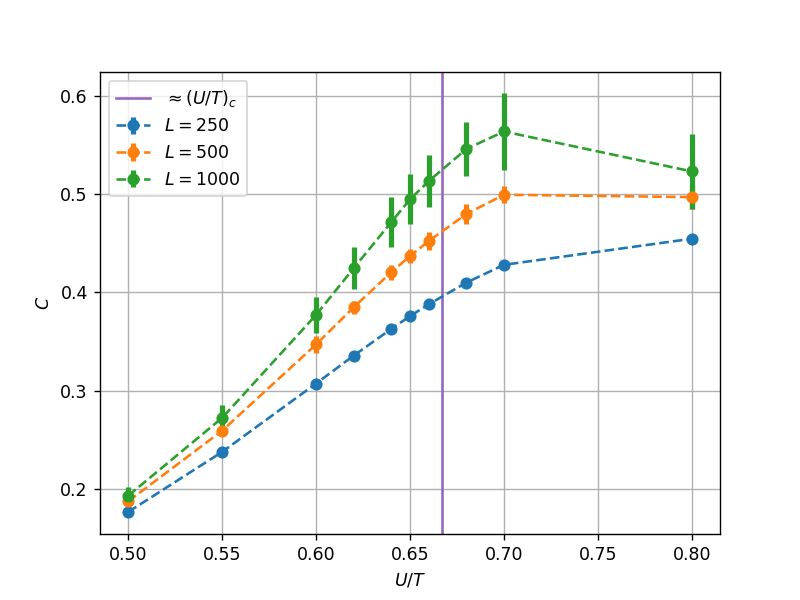

In [27]:
fig, ax = plt.subplots(1, 1)

for L, grp in df.groupby("L"):
    ax.errorbar(grp["U"], grp["var_nn"]*grp["U"]**2, yerr=grp["err_var_nn"]*grp["U"]**2,
                fmt='o--', elinewidth=3, label=r"$L=%s$" % L)

ax.axvline(U_theta, label=r'$\approx(U/T)_c$', color='C4') 
ax.legend(loc='best')
ax.set_xlabel(r'$U/T$')
ax.set_ylabel(r'$C$')
plt.grid(True)
plt.show()

## Scaling of the heat capacity

Rensburg, Eq. (4.30)

$$
C = L^{2\phi - 1} f(L^{\phi} \tau)
$$

Thus, use an Ansatz

$$
C / L^{2\phi - 1} \quad\text{vs}\quad  (U - U_c) L^{\phi} 
$$

<IPython.core.display.Javascript object>


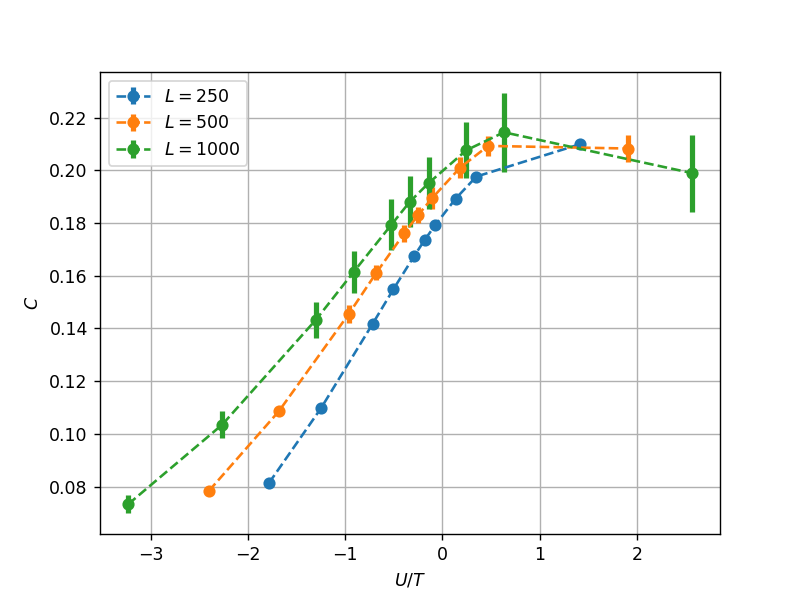

In [57]:
fig, ax = plt.subplots(1, 1)

for L, grp in df.groupby("L"):
    
    ax.errorbar((grp["U"] - U_theta) * L**(phi),
                grp["var_nn"]*grp["U"]**2 / L**0.14,  #(2*phi-1),
                yerr=grp["err_var_nn"]*grp["U"]**2 / L**0.14 ,#(2*phi-1), 
                fmt='o--', elinewidth=3, label=r"$L=%s$" % L)

ax.legend(loc='best')
ax.set_xlabel(r'$U/T$')
ax.set_ylabel(r'$C$')
plt.grid(True)
plt.show()

In [49]:
2*phi - 1

-0.1428571428571429

In [73]:
fig, ax = plt.subplots(1, 1)

for L, grp in df.groupby("L"):
    
    ax.errorbar((grp["U"] - U_theta) * L**(phi),
                grp["nn"] *grp["U"]/ L**(phi-1),
                yerr=grp["err_nn"]*grp["U"] / L**(phi-1), 
                fmt='o--', elinewidth=3, label=r"$L=%s$" % L)

ax.legend(loc='best')
ax.set_xlabel(r'$U/T$')
ax.set_ylabel(r'$E$')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [1]:
!pwd

/home/br/sweethome/SAW/SAW/runs_conf_hcap
